### Preprocessing dataset con metro

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'
from pandas_profiling import ProfileReport 
import warnings
warnings.filterwarnings("ignore")

before=pd.read_csv("Dataset_definitivo_rip2_1.csv", sep=';', dtype = 'unicode')
before

,vehicle_id,arrival_time,departure_time,stop_id,stop_name,stop_sequence,stop_id_SUMO,stopinfo_delay,stopinfo_ended,stopinfo_initialPersons,stopinfo_loadedPersons,stopinfo_started,stopinfo_type,stopinfo_unloadedPersons,route_id,service_id,trip_headsign,block_id,sumo_delay
0,9408851-I21224-InvFer-Semaine-16,2022-04-25 06:00:00,06:00:00,0904,PALLAVICINI/CAPOLINEA,1,77621958:13.00,14.00,06:00:04,0,0,2022-04-25 05:59:50,bus,0,272-152,I21224-InvFer-Semaine-16,BEGATO,1143602,-10.0
1,9408851-I21224-InvFer-Semaine-16,2022-04-25 06:01:00,06:01:00,1894,VEZZANI 1/AUTOSTRADA,2,551686509#1:17.73,12.00,06:01:02,0,0,2022-04-25 06:00:50,bus,0,272-152,I21224-InvFer-Semaine-16,BEGATO,1143602,-10.0
2,9408851-I21224-InvFer-Semaine-16,2022-04-25 06:02:00,06:02:00,1928,CAMBIASO 1/VEZZANI,3,77634307#0:29.17,6.00,06:01:56,0,0,2022-04-25 06:01:08,bus,0,272-152,I21224-InvFer-Semaine-16,BEGATO,1143602,-52.0
3,9408851-I21224-InvFer-Semaine-16,2022-04-25 06:03:00,06:03:00,1929,CAMBIASO 2/CHIESA DI RIVAROLO,4,77634307#5:13.00,8.00,06:02:58,0,0,2022-04-25 06:02:21,bus,0,272-152,I21224-InvFer-Semaine-16,BEGATO,1143602,-39.0
4,9408851-I21224-InvFer-Semaine-16,2022-04-25 06:04:00,06:04:00,1930,CAMBIASO 3/,5,77634307#10:33.23,7.00,06:03:57,0,1,2022-04-25 06:03:17,bus,0,272-152,I21224-InvFer-Semaine-16,BEGATO,1143602,-43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312311,9303944-MM2022-InvFer-Semaine-00,2022-04-25 05:07:00,05:07:00,MM05,SAN GIORGIO/METRO,4,392991599#2:110.00,5.00,05:06:55,44,9,2022-04-25 05:06:04,subway,1,MM-91,MM2022-InvFer-Semaine-00,BRIN,1137367,-56.0
312312,9303944-MM2022-InvFer-Semaine-00,2022-04-25 05:08:22,05:08:22,MM04,DARSENA/METRO,5,392991598#3:336.63,4.00,05:08:16,52,44,2022-04-25 05:07:07,subway,5,MM-91,MM2022-InvFer-Semaine-00,BRIN,1137367,-75.0
312313,9303944-MM2022-InvFer-Semaine-00,2022-04-25 05:10:00,05:10:00,MM01,PRINCIPE/METRO,6,392991598#3:1074.54,4.00,05:09:54,91,4,2022-04-25 05:08:37,subway,14,MM-91,MM2022-InvFer-Semaine-00,BRIN,1137367,-83.0
312314,9303944-MM2022-InvFer-Semaine-00,2022-04-25 05:11:00,05:11:00,MM02,DINEGRO/METRO,7,166332622:110.00,4.00,05:10:54,81,48,2022-04-25 05:10:18,subway,51,MM-91,MM2022-InvFer-Semaine-00,BRIN,1137367,-42.0


In [50]:
before['arrival_time'] = before['arrival_time'].str.replace('^24:', '00:', regex=True)
before['arrival_time'] = before['arrival_time'].str.replace('^25:', '01:', regex=True)
before['arrival_time'] = before['arrival_time'].str.replace('^26:', '02:', regex=True)
before['arrival_time'] = before['arrival_time'].str.replace('^27:', '03:', regex=True)
before['arrival_time'] = before['arrival_time'].str.replace('^28:', '04:', regex=True)
before['arrival_time']=pd.to_datetime(before["arrival_time"], dayfirst=True)
before['departure_time'] = before['departure_time'].str.replace('^24:', '00:', regex=True)
before['departure_time'] = before['departure_time'].str.replace('^25:', '01:', regex=True)
before['departure_time'] = before['departure_time'].str.replace('^26:', '02:', regex=True)
before['departure_time'] = before['departure_time'].str.replace('^27:', '03:', regex=True)
before['departure_time'] = before['departure_time'].str.replace('^28:', '04:', regex=True)
#before['departure_time']=pd.to_datetime(before["departure_time"], dayfirst=True)
before

,vehicle_id,arrival_time,departure_time,stop_id,stop_name,stop_sequence,stop_id_SUMO,stopinfo_delay,stopinfo_ended,stopinfo_initialPersons,stopinfo_loadedPersons,stopinfo_started,stopinfo_type,stopinfo_unloadedPersons,route_id,service_id,trip_headsign,block_id,sumo_delay
0,9408851-I21224-InvFer-Semaine-16,2022-04-25 06:00:00,06:00:00,0904,PALLAVICINI/CAPOLINEA,1,77621958:13.00,14.00,06:00:04,0,0,2022-04-25 05:59:50,bus,0,272-152,I21224-InvFer-Semaine-16,BEGATO,1143602,-10.0
1,9408851-I21224-InvFer-Semaine-16,2022-04-25 06:01:00,06:01:00,1894,VEZZANI 1/AUTOSTRADA,2,551686509#1:17.73,12.00,06:01:02,0,0,2022-04-25 06:00:50,bus,0,272-152,I21224-InvFer-Semaine-16,BEGATO,1143602,-10.0
2,9408851-I21224-InvFer-Semaine-16,2022-04-25 06:02:00,06:02:00,1928,CAMBIASO 1/VEZZANI,3,77634307#0:29.17,6.00,06:01:56,0,0,2022-04-25 06:01:08,bus,0,272-152,I21224-InvFer-Semaine-16,BEGATO,1143602,-52.0
3,9408851-I21224-InvFer-Semaine-16,2022-04-25 06:03:00,06:03:00,1929,CAMBIASO 2/CHIESA DI RIVAROLO,4,77634307#5:13.00,8.00,06:02:58,0,0,2022-04-25 06:02:21,bus,0,272-152,I21224-InvFer-Semaine-16,BEGATO,1143602,-39.0
4,9408851-I21224-InvFer-Semaine-16,2022-04-25 06:04:00,06:04:00,1930,CAMBIASO 3/,5,77634307#10:33.23,7.00,06:03:57,0,1,2022-04-25 06:03:17,bus,0,272-152,I21224-InvFer-Semaine-16,BEGATO,1143602,-43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312311,9303944-MM2022-InvFer-Semaine-00,2022-04-25 05:07:00,05:07:00,MM05,SAN GIORGIO/METRO,4,392991599#2:110.00,5.00,05:06:55,44,9,2022-04-25 05:06:04,subway,1,MM-91,MM2022-InvFer-Semaine-00,BRIN,1137367,-56.0
312312,9303944-MM2022-InvFer-Semaine-00,2022-04-25 05:08:22,05:08:22,MM04,DARSENA/METRO,5,392991598#3:336.63,4.00,05:08:16,52,44,2022-04-25 05:07:07,subway,5,MM-91,MM2022-InvFer-Semaine-00,BRIN,1137367,-75.0
312313,9303944-MM2022-InvFer-Semaine-00,2022-04-25 05:10:00,05:10:00,MM01,PRINCIPE/METRO,6,392991598#3:1074.54,4.00,05:09:54,91,4,2022-04-25 05:08:37,subway,14,MM-91,MM2022-InvFer-Semaine-00,BRIN,1137367,-83.0
312314,9303944-MM2022-InvFer-Semaine-00,2022-04-25 05:11:00,05:11:00,MM02,DINEGRO/METRO,7,166332622:110.00,4.00,05:10:54,81,48,2022-04-25 05:10:18,subway,51,MM-91,MM2022-InvFer-Semaine-00,BRIN,1137367,-42.0


In [51]:
before['stopinfo_initialPersons']=before['stopinfo_initialPersons'].astype(int)

In [35]:
#before.to_csv("Dataset_definitivo1.csv")

In [52]:
before_bus = before[before['stopinfo_type'].str.contains('bus')]
before_bus

,vehicle_id,arrival_time,departure_time,stop_id,stop_name,stop_sequence,stop_id_SUMO,stopinfo_delay,stopinfo_ended,stopinfo_initialPersons,stopinfo_loadedPersons,stopinfo_started,stopinfo_type,stopinfo_unloadedPersons,route_id,service_id,trip_headsign,block_id,sumo_delay
0,9408851-I21224-InvFer-Semaine-16,2022-04-25 06:00:00,06:00:00,0904,PALLAVICINI/CAPOLINEA,1,77621958:13.00,14.00,06:00:04,0,0,2022-04-25 05:59:50,bus,0,272-152,I21224-InvFer-Semaine-16,BEGATO,1143602,-10.0
1,9408851-I21224-InvFer-Semaine-16,2022-04-25 06:01:00,06:01:00,1894,VEZZANI 1/AUTOSTRADA,2,551686509#1:17.73,12.00,06:01:02,0,0,2022-04-25 06:00:50,bus,0,272-152,I21224-InvFer-Semaine-16,BEGATO,1143602,-10.0
2,9408851-I21224-InvFer-Semaine-16,2022-04-25 06:02:00,06:02:00,1928,CAMBIASO 1/VEZZANI,3,77634307#0:29.17,6.00,06:01:56,0,0,2022-04-25 06:01:08,bus,0,272-152,I21224-InvFer-Semaine-16,BEGATO,1143602,-52.0
3,9408851-I21224-InvFer-Semaine-16,2022-04-25 06:03:00,06:03:00,1929,CAMBIASO 2/CHIESA DI RIVAROLO,4,77634307#5:13.00,8.00,06:02:58,0,0,2022-04-25 06:02:21,bus,0,272-152,I21224-InvFer-Semaine-16,BEGATO,1143602,-39.0
4,9408851-I21224-InvFer-Semaine-16,2022-04-25 06:04:00,06:04:00,1930,CAMBIASO 3/,5,77634307#10:33.23,7.00,06:03:57,0,1,2022-04-25 06:03:17,bus,0,272-152,I21224-InvFer-Semaine-16,BEGATO,1143602,-43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309759,9510078-INT2022-Fer-Semaine-15,2022-04-25 18:41:00,18:41:00,I566,DI CRETO 2/,14,1137085134#1:177.99,4.00,18:40:54,6,0,2022-04-25 18:39:57,bus,0,I27-149,INT2022-Fer-Semaine-15,STRUPPA,1148634,-63.0
309760,9510078-INT2022-Fer-Semaine-15,2022-04-25 18:41:00,18:41:00,I567,DI CRETO 3/CIMITERO,15,416452385#0:16.84,22.00,18:41:12,6,1,2022-04-25 18:41:01,bus,0,I27-149,INT2022-Fer-Semaine-15,STRUPPA,1148634,1.0
309761,9510078-INT2022-Fer-Semaine-15,2022-04-25 18:42:00,18:42:00,I568,DI CRETO 4/PASSO RENATO,16,416452385#4:71.42,5.00,18:41:55,7,0,2022-04-25 18:41:18,bus,0,I27-149,INT2022-Fer-Semaine-15,STRUPPA,1148634,-42.0
309762,9510078-INT2022-Fer-Semaine-15,2022-04-25 18:43:00,18:43:00,I569,DI CRETO 5/PERAGALLO,17,416452385#11:65.06,3.00,18:42:53,7,0,2022-04-25 18:41:58,bus,0,I27-149,INT2022-Fer-Semaine-15,STRUPPA,1148634,-62.0


In [53]:
# Calcola la media di stopinfo_initialPersons
media_initial_persons = before_bus['stopinfo_initialPersons'].mean()

# Stampa la media
print(f"Media di stopinfo_initialPersons: {media_initial_persons}")

Media di stopinfo_initialPersons: 14.269072584289976


### Preprocessing senza metro

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'
from pandas_profiling import ProfileReport 
import warnings
warnings.filterwarnings("ignore")

after=pd.read_csv("Dataset_definitivo_rip2_nometro.csv", sep=';', dtype = 'unicode')
after

,vehicle_id,arrival_time,departure_time,stop_id,stop_name,stop_sequence,stop_id_SUMO,stopinfo_delay,stopinfo_ended,stopinfo_initialPersons,stopinfo_loadedPersons,stopinfo_started,stopinfo_type,stopinfo_unloadedPersons,route_id,service_id,trip_headsign,block_id,sumo_delay
0,9408851-I21224-InvFer-Semaine-16,2022-04-25 06:00:00,06:00:00,0904,PALLAVICINI/CAPOLINEA,1,77621958:13.00,14.00,06:00:04,0,0,2022-04-25 05:59:50,bus,0,272-152,I21224-InvFer-Semaine-16,BEGATO,1143602,-10.0
1,9408851-I21224-InvFer-Semaine-16,2022-04-25 06:01:00,06:01:00,1894,VEZZANI 1/AUTOSTRADA,2,551686509#1:17.73,12.00,06:01:02,0,0,2022-04-25 06:00:50,bus,0,272-152,I21224-InvFer-Semaine-16,BEGATO,1143602,-10.0
2,9408851-I21224-InvFer-Semaine-16,2022-04-25 06:02:00,06:02:00,1928,CAMBIASO 1/VEZZANI,3,77634307#0:29.17,6.00,06:01:56,0,0,2022-04-25 06:01:08,bus,0,272-152,I21224-InvFer-Semaine-16,BEGATO,1143602,-52.0
3,9408851-I21224-InvFer-Semaine-16,2022-04-25 06:03:00,06:03:00,1929,CAMBIASO 2/CHIESA DI RIVAROLO,4,77634307#5:13.00,8.00,06:02:58,0,0,2022-04-25 06:02:21,bus,0,272-152,I21224-InvFer-Semaine-16,BEGATO,1143602,-39.0
4,9408851-I21224-InvFer-Semaine-16,2022-04-25 06:04:00,06:04:00,1930,CAMBIASO 3/,5,77634307#10:33.23,7.00,06:03:57,0,0,2022-04-25 06:03:17,bus,0,272-152,I21224-InvFer-Semaine-16,BEGATO,1143602,-43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309623,9510078-INT2022-Fer-Semaine-15,2022-04-25 18:41:00,18:41:00,I566,DI CRETO 2/,14,1137085134#1:177.99,4.00,18:40:54,9,1,2022-04-25 18:39:57,bus,0,I27-149,INT2022-Fer-Semaine-15,STRUPPA,1148634,-63.0
309624,9510078-INT2022-Fer-Semaine-15,2022-04-25 18:41:00,18:41:00,I567,DI CRETO 3/CIMITERO,15,416452385#0:16.84,22.00,18:41:12,10,0,2022-04-25 18:41:01,bus,1,I27-149,INT2022-Fer-Semaine-15,STRUPPA,1148634,1.0
309625,9510078-INT2022-Fer-Semaine-15,2022-04-25 18:42:00,18:42:00,I568,DI CRETO 4/PASSO RENATO,16,416452385#4:71.42,5.00,18:41:55,9,0,2022-04-25 18:41:18,bus,0,I27-149,INT2022-Fer-Semaine-15,STRUPPA,1148634,-42.0
309626,9510078-INT2022-Fer-Semaine-15,2022-04-25 18:43:00,18:43:00,I569,DI CRETO 5/PERAGALLO,17,416452385#11:65.06,3.00,18:42:53,9,0,2022-04-25 18:41:58,bus,0,I27-149,INT2022-Fer-Semaine-15,STRUPPA,1148634,-62.0


In [40]:
after['arrival_time'] = after['arrival_time'].str.replace('^24:', '00:', regex=True)
after['arrival_time'] = after['arrival_time'].str.replace('^25:', '01:', regex=True)
after['arrival_time'] = after['arrival_time'].str.replace('^26:', '02:', regex=True)
after['arrival_time'] = after['arrival_time'].str.replace('^27:', '03:', regex=True)
after['arrival_time'] = after['arrival_time'].str.replace('^28:', '04:', regex=True)
after['arrival_time']=pd.to_datetime(after["arrival_time"], dayfirst=True)
after['departure_time'] = after['departure_time'].str.replace('^24:', '00:', regex=True)
after['departure_time'] = after['departure_time'].str.replace('^25:', '01:', regex=True)
after['departure_time'] = after['departure_time'].str.replace('^26:', '02:', regex=True)
after['departure_time'] = after['departure_time'].str.replace('^27:', '03:', regex=True)
after['departure_time'] = after['departure_time'].str.replace('^28:', '04:', regex=True)
#after['departure_time']=pd.to_datetime(after["departure_time"], dayfirst=True)
after

,vehicle_id,arrival_time,departure_time,stop_id,stop_name,stop_sequence,stop_id_SUMO,stopinfo_delay,stopinfo_ended,stopinfo_initialPersons,stopinfo_loadedPersons,stopinfo_started,stopinfo_type,stopinfo_unloadedPersons,route_id,service_id,trip_headsign,block_id,sumo_delay
0,9408851-I21224-InvFer-Semaine-16,2022-04-25 06:00:00,06:00:00,0904,PALLAVICINI/CAPOLINEA,1,77621958:13.00,14.00,06:00:04,0,0,2022-04-25 05:59:50,bus,0,272-152,I21224-InvFer-Semaine-16,BEGATO,1143602,-10.0
1,9408851-I21224-InvFer-Semaine-16,2022-04-25 06:01:00,06:01:00,1894,VEZZANI 1/AUTOSTRADA,2,551686509#1:17.73,12.00,06:01:02,0,0,2022-04-25 06:00:50,bus,0,272-152,I21224-InvFer-Semaine-16,BEGATO,1143602,-10.0
2,9408851-I21224-InvFer-Semaine-16,2022-04-25 06:02:00,06:02:00,1928,CAMBIASO 1/VEZZANI,3,77634307#0:29.17,6.00,06:01:56,0,0,2022-04-25 06:01:08,bus,0,272-152,I21224-InvFer-Semaine-16,BEGATO,1143602,-52.0
3,9408851-I21224-InvFer-Semaine-16,2022-04-25 06:03:00,06:03:00,1929,CAMBIASO 2/CHIESA DI RIVAROLO,4,77634307#5:13.00,8.00,06:02:58,0,0,2022-04-25 06:02:21,bus,0,272-152,I21224-InvFer-Semaine-16,BEGATO,1143602,-39.0
4,9408851-I21224-InvFer-Semaine-16,2022-04-25 06:04:00,06:04:00,1930,CAMBIASO 3/,5,77634307#10:33.23,7.00,06:03:57,0,0,2022-04-25 06:03:17,bus,0,272-152,I21224-InvFer-Semaine-16,BEGATO,1143602,-43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309623,9510078-INT2022-Fer-Semaine-15,2022-04-25 18:41:00,18:41:00,I566,DI CRETO 2/,14,1137085134#1:177.99,4.00,18:40:54,9,1,2022-04-25 18:39:57,bus,0,I27-149,INT2022-Fer-Semaine-15,STRUPPA,1148634,-63.0
309624,9510078-INT2022-Fer-Semaine-15,2022-04-25 18:41:00,18:41:00,I567,DI CRETO 3/CIMITERO,15,416452385#0:16.84,22.00,18:41:12,10,0,2022-04-25 18:41:01,bus,1,I27-149,INT2022-Fer-Semaine-15,STRUPPA,1148634,1.0
309625,9510078-INT2022-Fer-Semaine-15,2022-04-25 18:42:00,18:42:00,I568,DI CRETO 4/PASSO RENATO,16,416452385#4:71.42,5.00,18:41:55,9,0,2022-04-25 18:41:18,bus,0,I27-149,INT2022-Fer-Semaine-15,STRUPPA,1148634,-42.0
309626,9510078-INT2022-Fer-Semaine-15,2022-04-25 18:43:00,18:43:00,I569,DI CRETO 5/PERAGALLO,17,416452385#11:65.06,3.00,18:42:53,9,0,2022-04-25 18:41:58,bus,0,I27-149,INT2022-Fer-Semaine-15,STRUPPA,1148634,-62.0


In [41]:
after['stopinfo_initialPersons']=after['stopinfo_initialPersons'].astype(int)

In [44]:
#after_bus = after[after['stopinfo_type'].str.contains('subway')]
#after_bus

In [58]:
# Calcola la media di stopinfo_initialPersons
media_initial_persons = after['stopinfo_initialPersons'].mean()

# Stampa la media
print(f"Media di stopinfo_initialPersons: {media_initial_persons}")

Media di stopinfo_initialPersons: 11.986935936026457


In [62]:
before_bus['sumo_delay']=before_bus['sumo_delay'].astype(float)
# Calcola la media di stopinfo_initialPersons
media_initial_persons = before_bus['sumo_delay'].mean()

# Stampa la media
print(f"Media di stopinfo_initialPersons: {media_initial_persons}")

Media di stopinfo_initialPersons: 633.9035780518486


In [35]:
#after.to_csv("Dataset_definitivo_nometro.csv")

### Analisi occupancy autobus

In [64]:
occupancy = before_bus.groupby(before_bus["arrival_time"])["stopinfo_initialPersons"].sum().reset_index()
occupancy1 = after.groupby(after["arrival_time"])["stopinfo_initialPersons"].sum().reset_index()

In [66]:
df_c = pd.merge(occupancy1, occupancy, on='arrival_time')
#df_c

In [56]:
df_c['arrival_time']=pd.to_datetime(df_c["arrival_time"], dayfirst=True)
df_c['stopinfo_initialPersons_x']=df_c['stopinfo_initialPersons_x'].astype(float)
df_c['stopinfo_initialPersons_y']=df_c['stopinfo_initialPersons_y'].astype(float)
df_c

,arrival_time,stopinfo_initialPersons_x,stopinfo_initialPersons_y
0,2022-04-25 03:46:00,0.0,0.0
1,2022-04-25 03:47:00,45.0,64.0
2,2022-04-25 03:49:00,197.0,200.0
3,2022-04-25 03:50:00,100.0,100.0
4,2022-04-25 03:51:00,126.0,115.0
...,...,...,...
1208,2022-04-25 23:55:00,2021.0,2118.0
1209,2022-04-25 23:56:00,3367.0,3681.0
1210,2022-04-25 23:57:00,3333.0,3526.0
1211,2022-04-25 23:58:00,2507.0,2537.0


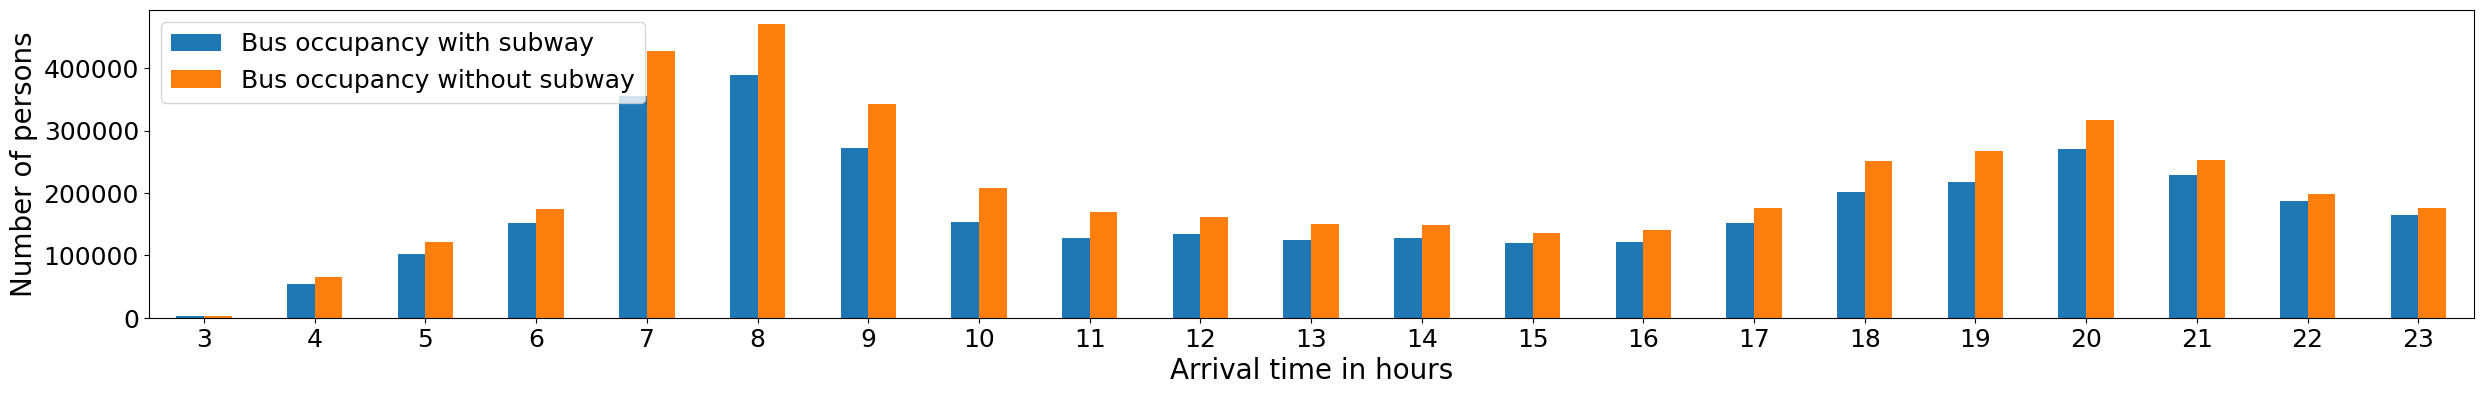

In [68]:
fig, axs = plt.subplots(figsize=(30, 4))

#march8_after_044.groupby(march8_after_044["arrival_time"].dt.hour)

df_c.groupby(df_c["arrival_time"].dt.hour)["stopinfo_initialPersons_x","stopinfo_initialPersons_y"].sum().plot(kind='bar', rot=0, ax = axs, fontsize =18)
plt.ylabel("Number of persons", fontsize=20)
plt.xlabel("Arrival time in hours", fontsize=20)
#leg = ax.legend();
#plt.xlim([1.5, 7.5])

legend_drawn_flag = True
plt.legend(["Bus occupancy with subway", "Bus occupancy without subway"], loc=2, frameon=legend_drawn_flag, fontsize=18)

### Delay

In [72]:
delay = before_bus.groupby(before_bus["arrival_time"])["sumo_delay"].mean().reset_index()
delay1 = after.groupby(after["arrival_time"])["sumo_delay"].mean().reset_index()
#delay1

In [82]:
df_d = pd.merge(delay, delay1, on='arrival_time')
#df_d

In [83]:
df_d['arrival_time']=pd.to_datetime(df_d["arrival_time"], dayfirst=True)
df_d['sumo_delay_x']=df_d['sumo_delay_x'].astype(float)
df_d['sumo_delay_y']=df_d['sumo_delay_y'].astype(float)
#df_d

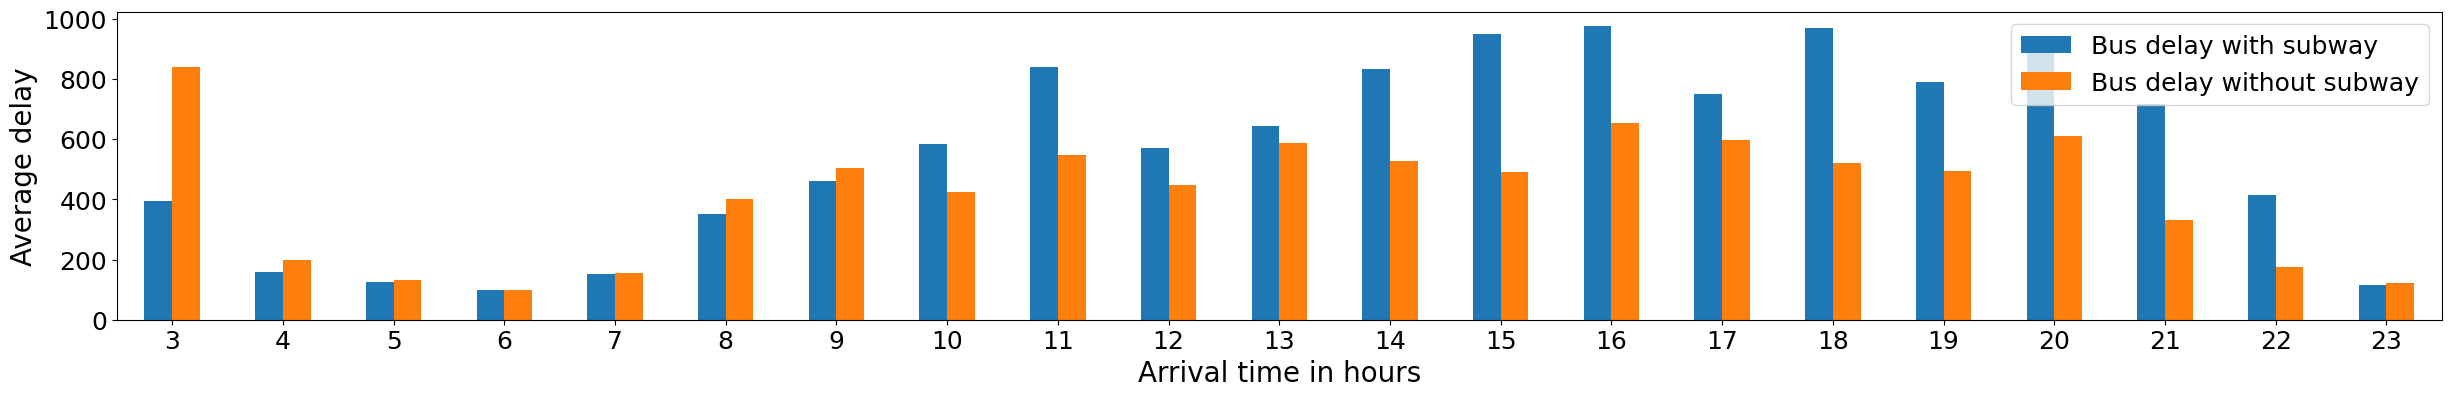

In [84]:
fig, axs = plt.subplots(figsize=(30, 4))

#march8_after_044.groupby(march8_after_044["arrival_time"].dt.hour)

df_d.groupby(df_d["arrival_time"].dt.hour)["sumo_delay_x","sumo_delay_y"].mean().plot(kind='bar', rot=0, ax = axs, fontsize =18)
plt.ylabel("Average delay", fontsize=20)
plt.xlabel("Arrival time in hours", fontsize=20)
#leg = ax.legend();
#plt.xlim([1.5, 7.5])

legend_drawn_flag = True
plt.legend(["Bus delay with subway", "Bus delay without subway"], loc=1, frameon=legend_drawn_flag, fontsize=18)